In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
X = np.array([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
              [1, 1, 2, 5, 3, 0, 5, 10, 1, 2],
              [500, 700, 750, 600, 1450, 800, 1500, 2000, 450, 1000],
              [1, 1, 2, 1, 2, 1, 3, 3, 1, 2]])

In [3]:
y = [45, 55, 50, 55, 60, 35, 75, 80, 50, 60]

In [4]:
def calc_norm_fit(x):
    if (np.max(x) - np.min(x)) == 0:
        res = np.zeros(x.shape)
    else:
        res = (x - np.min(x)) / (np.max(x) - np.min(x))
    return res

In [5]:
def calc_std_fit(x):
    if x.std() == 0:
        res = np.zeros(x.shape)
    else:
        res = (x - x.mean()) / x.std()
    return res

In [6]:
X_norm = X.copy().astype(np.float32)
X_st = X.copy().astype(np.float32)
for i in range(X.shape[0]):
    X_norm[i] = calc_norm_fit(X_norm[i])
    X_st[i] = calc_std_fit(X_st[i])
print(f"Нормализация:\n{np.round(X_norm, 4)}\n")
print(f'Стандартизация:\n{np.round(X_st, 4)}\n')

Нормализация:
[[0.     0.     0.     0.     0.     0.     0.     0.     0.     0.    ]
 [0.1    0.1    0.2    0.5    0.3    0.     0.5    1.     0.1    0.2   ]
 [0.0323 0.1613 0.1935 0.0968 0.6452 0.2258 0.6774 1.     0.     0.3548]
 [0.     0.     0.5    0.     0.5    0.     1.     1.     0.     0.5   ]]

Стандартизация:
[[ 0.      0.      0.      0.      0.      0.      0.      0.      0.
   0.    ]
 [-0.7071 -0.7071 -0.3536  0.7071  0.     -1.0607  0.7071  2.4749 -0.7071
  -0.3536]
 [-0.9796 -0.5671 -0.464  -0.7734  0.9796 -0.3609  1.0827  2.1139 -1.0827
   0.0516]
 [-0.8963 -0.8963  0.3841 -0.8963  0.3841 -0.8963  1.6645  1.6645 -0.8963
   0.3841]]



In [7]:
def calc_mse(y, y_pred):
    err = np.mean((y - y_pred) ** 2)
    return err

In [8]:
def eval_model_reg2(X, y, iterations, alpha=1e-4, lambda_=1e-8):
    np.random.seed(42)
    W = np.random.randn(X.shape[0])
    n = X.shape[1]
    for i in range(1, iterations+1):
        y_pred = np.dot(W, X)
        err = calc_mse(y, y_pred)
        W -= alpha * (1/n * 2 * np.dot((y_pred - y), X.T) + lambda_ * W) 
    return W

### Практическое задание

## Постройте график зависимости весов всех признаков от lambda в L2-регуляризации на основе данных из урока.

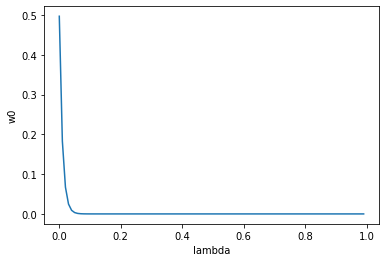

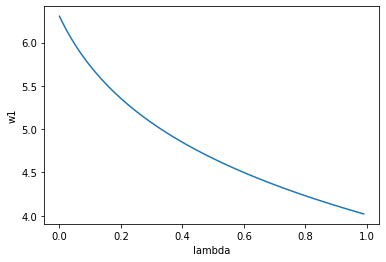

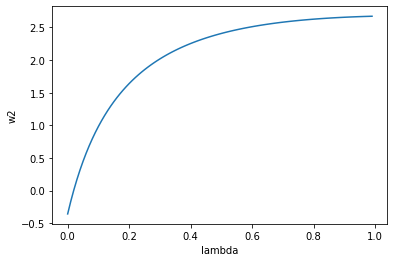

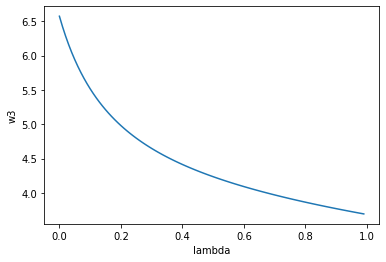

In [9]:
lambdas = np.array([i/100 for i in range(100)])
W_info = []
for l in lambdas:
    W = eval_model_reg2(X_st, y, iterations=10000, alpha=1e-2, lambda_=l)
    W_info.append(W)
W_info = np.array(W_info)
i = 0
for w in W_info.T:
    plt.plot(lambdas, w)
    plt.xlabel('lambda')
    plt.ylabel(f'w{i}')
    plt.show()
    i += 1

## Можно ли к одному и тому же признаку применить сразу и нормализацию, и стандартизацию?

Да, можно

In [10]:
# нормированный признак стандартизируем причем теперь значения могут быть за пределами интервала [0 - 1]
X_norm_standrtized = np.zeros(X_norm.shape)
for i in range(X_norm.shape[0]):
    X_norm_standrtized[i] = calc_std_fit(X_norm[i])

print(np.round(X_norm_standrtized, 4))
print(X_norm)

[[ 0.      0.      0.      0.      0.      0.      0.      0.      0.
   0.    ]
 [-0.7071 -0.7071 -0.3536  0.7071  0.     -1.0607  0.7071  2.4749 -0.7071
  -0.3536]
 [-0.9796 -0.5671 -0.464  -0.7734  0.9796 -0.3609  1.0827  2.1139 -1.0827
   0.0516]
 [-0.8963 -0.8963  0.3841 -0.8963  0.3841 -0.8963  1.6645  1.6645 -0.8963
   0.3841]]
[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.1        0.1        0.2        0.5        0.3        0.
  0.5        1.         0.1        0.2       ]
 [0.03225806 0.16129032 0.19354838 0.09677419 0.6451613  0.22580644
  0.67741936 1.         0.         0.3548387 ]
 [0.         0.         0.5        0.         0.5        0.
  1.         1.         0.         0.5       ]]


In [11]:
# стандартизированный признак нормируем причем теперь значения будут в интервале [0 - 1]
X_st_normalized = np.zeros(X_st.shape)
for i in range(X_st.shape[0]):
    X_st_normalized[i] = calc_std_fit(X_st[i])

print(np.round(X_st_normalized, 4))
print(X_st)

[[ 0.      0.      0.      0.      0.      0.      0.      0.      0.
   0.    ]
 [-0.7071 -0.7071 -0.3536  0.7071  0.     -1.0607  0.7071  2.4749 -0.7071
  -0.3536]
 [-0.9796 -0.5671 -0.464  -0.7734  0.9796 -0.3609  1.0827  2.1139 -1.0827
   0.0516]
 [-0.8963 -0.8963  0.3841 -0.8963  0.3841 -0.8963  1.6645  1.6645 -0.8963
   0.3841]]
[[ 0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.        ]
 [-0.70710677 -0.70710677 -0.35355338  0.70710677  0.         -1.0606602
   0.70710677  2.4748738  -0.70710677 -0.35355338]
 [-0.9795897  -0.56713086 -0.46401617 -0.7733603   0.9795897  -0.36090147
   1.0827044   2.1138515  -1.0827044   0.05155735]
 [-0.8962582  -0.8962582   0.38411057 -0.8962582   0.38411057 -0.8962582
   1.6644794   1.6644794  -0.8962582   0.38411057]]


## Напишите функцию наподобие eval_model_reg2, но для применения L1-регуляризации.

In [12]:
def eval_model_reg1(X, y, iterations, alpha=1e-4, lambda_=1e-8):
    np.random.seed(42)
    W = np.random.randn(X.shape[0])
    n = X.shape[1]
    for i in range(1, iterations+1):
        y_pred = np.dot(W, X)
        err = calc_mse(y, y_pred)
        W -= alpha * (1/n * 2 * np.dot((y_pred - y), X.T) + lambda_ * np.sign(W)) 
    return W

Построим графики зависимостей между штрафным коэффициентом и весами

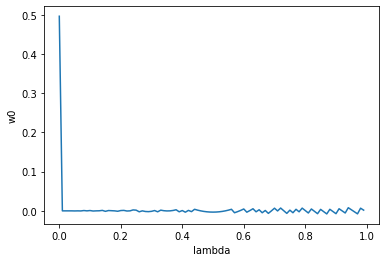

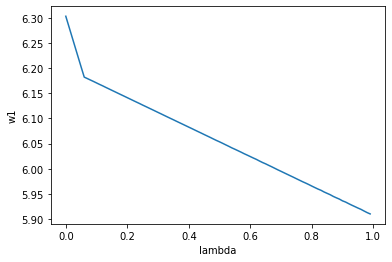

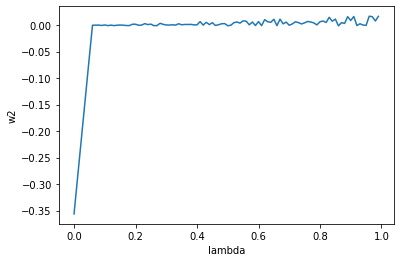

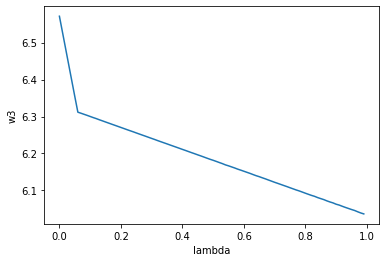

In [13]:
W_info = []
for l in lambdas:
    W = eval_model_reg1(X_st, y, iterations=10000, alpha=1e-2, lambda_=l)
    W_info.append(W)
W_info = np.array(W_info)
i = 0
for w in W_info.T:
    plt.plot(lambdas, w)
    plt.xlabel('lambda')
    plt.ylabel(f'w{i}')
    plt.show()
    i += 1